## TIME SERIES ANALYSIS

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [44]:
rest = pd.read_csv(r'D:/datasets/RestaurantVisitors.csv',index_col='date', parse_dates=True )

In [45]:
rest = rest.dropna()

In [46]:
rest.shape

(478, 8)

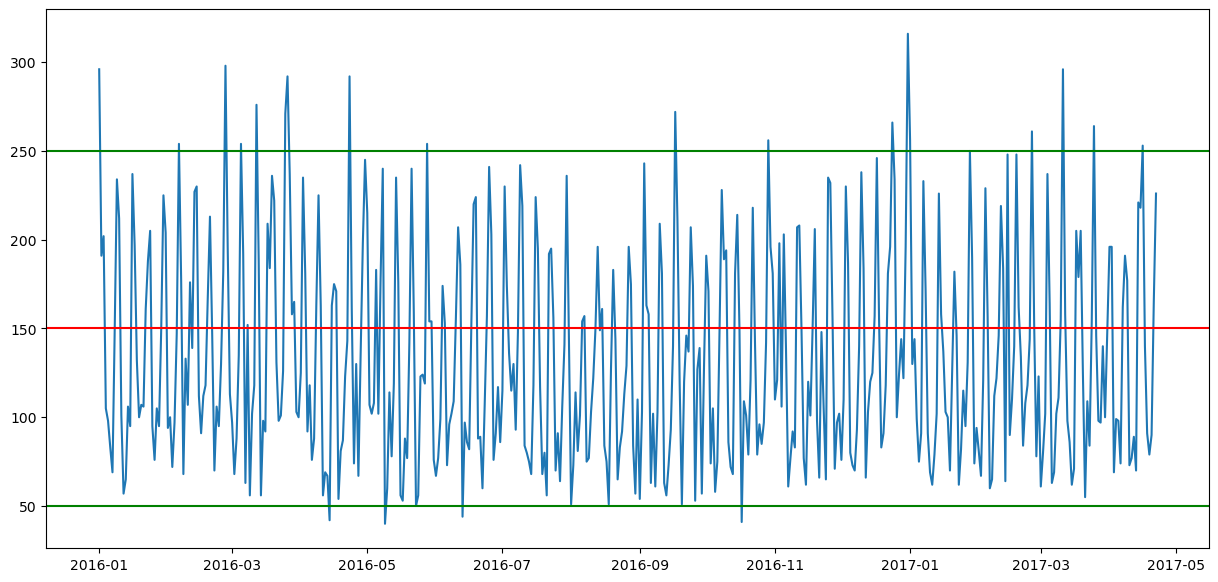

In [47]:
plt.figure(figsize = (15,7))
plt.plot(rest.total)
plt.axhline(y =150 ,color = 'r')
plt.axhline(y =50 ,color = 'g')
plt.axhline(y =250 ,color = 'g')

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [90]:
rest_seasonal = seasonal_decompose(rest.total)

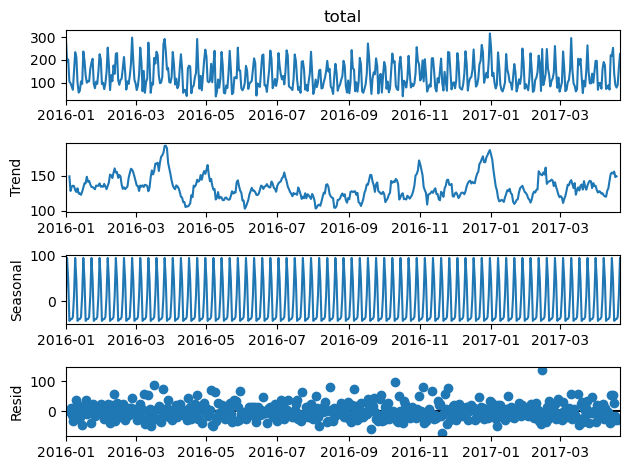

In [91]:
rest_seasonal.plot()
plt.show()

##### FROM THE ABOVE GRAPH WE CAN SEE THAT
1. DATA IS SEASONAL IN PERIOD OF 7 DAYS
2. DATA IS STATIONARY
3. THERE IS NO TREND IN THE DATA

In [92]:
ho_index = rest[rest.holiday ==1].index
ho_index     
#SELECTING THE DATES ON WHICH THERE IS HOLIDAYS

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

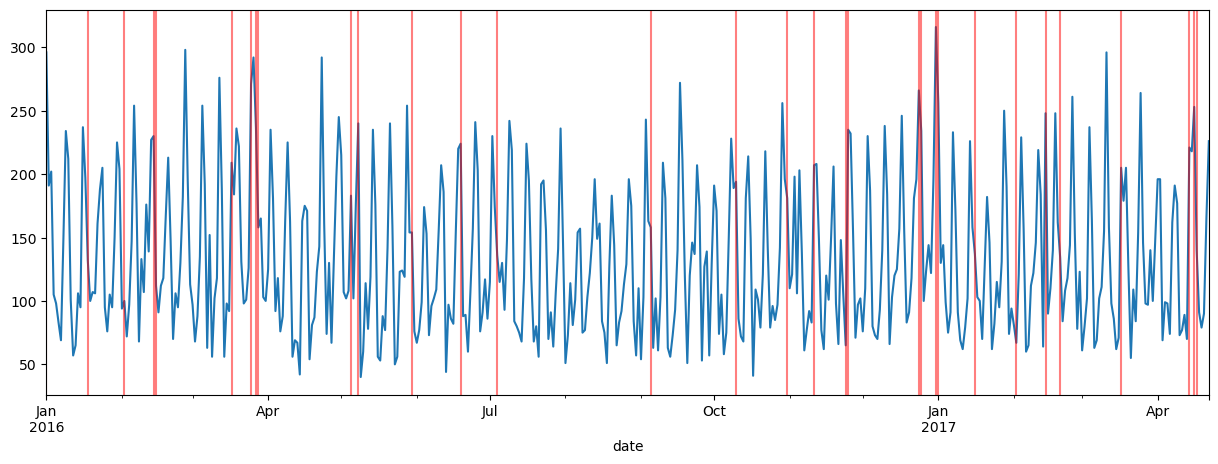

In [107]:
ax = rest['total'].plot(figsize = (15,5))
for day in ho_index:
    ax.axvline(x = day , color = 'red', alpha = .5)

##### this graph is to show that holidays are impacting the number of people visiting restaurant , normally with holidays there is sudden increase ,So SARIMA model may not be sufficient so we have to use SARIMAX as there is external factor affecting our data

In [52]:
import pmdarima
from pmdarima import auto_arima

In [55]:
auto_arima(rest['total'], seasonal=True , m=7 , maxiter =50)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [56]:
rest_train = rest.iloc[0:450]
rest_test = rest.iloc[450::]       
# Dividing data into train and test sets

###### MODEL CREATION

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [95]:
modelsarima_rest =SARIMAX(rest_train.total , order=(0, 0, 0),seasonal_order=(1, 0, 1, 7))

In [59]:
result=modelsarima_rest.fit()

In [60]:
pred=result.predict(start=450 , end=477) 
#PREDICTION ARE MADE ON TEST DATASET

In [61]:
pred

2017-03-26    174.193094
2017-03-27     90.608578
2017-03-28     95.758426
2017-03-29     95.479700
2017-03-30     96.690329
2017-03-31    145.286426
2017-04-01    232.771802
2017-04-02    174.182158
2017-04-03     90.602890
2017-04-04     95.752415
2017-04-05     95.473706
2017-04-06     96.684259
2017-04-07    145.277306
2017-04-08    232.757189
2017-04-09    174.171223
2017-04-10     90.597202
2017-04-11     95.746404
2017-04-12     95.467712
2017-04-13     96.678190
2017-04-14    145.268185
2017-04-15    232.742577
2017-04-16    174.160289
2017-04-17     90.591515
2017-04-18     95.740393
2017-04-19     95.461719
2017-04-20     96.672120
2017-04-21    145.259066
2017-04-22    232.727965
Freq: D, Name: predicted_mean, dtype: float64

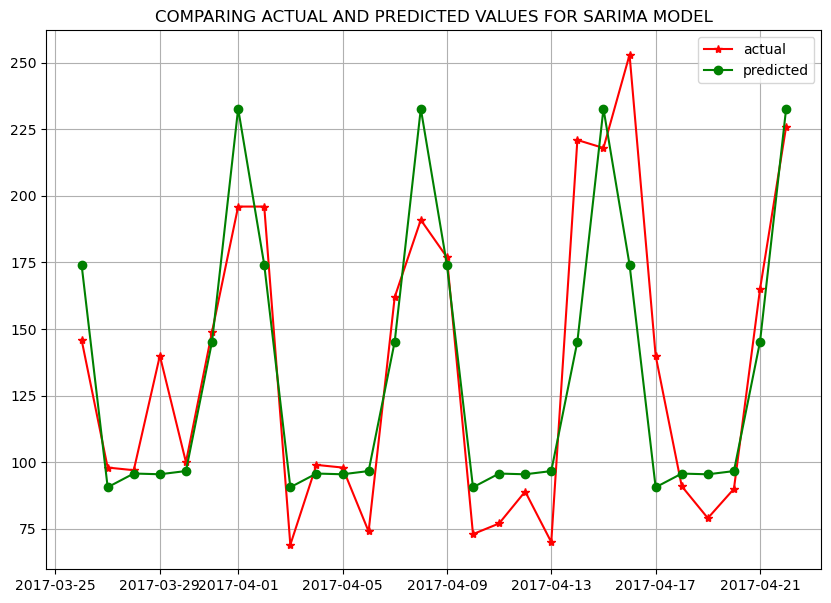

In [98]:
plt.figure(figsize = (10,7))
plt.plot(rest_test['total'] , color = 'r',marker = '*',label = 'actual')
plt.plot(pred , color = 'g' , marker = 'o' , label = 'predicted')
plt.title('COMPARING ACTUAL AND PREDICTED VALUES FOR SARIMA MODEL')
plt.grid()
plt.legend()


In [99]:
df = pd.DataFrame()
df['actual'] =rest_test['total']
df['predicted'] = pred
df['error'] = df.actual - df.predicted
df['%diff'] = np.abs(df.error)*100/df.actual

In [100]:
df

,actual,predicted,error,%diff
date,,,,
2017-03-26,146.0,174.193094,-28.193094,19.310338
2017-03-27,98.0,90.608578,7.391422,7.542267
2017-03-28,97.0,95.758426,1.241574,1.279973
2017-03-29,140.0,95.479700,44.520300,31.800214
2017-03-30,100.0,96.690329,3.309671,3.309671
2017-03-31,149.0,145.286426,3.713574,2.492331
2017-04-01,196.0,232.771802,-36.771802,18.761123
2017-04-02,196.0,174.182158,21.817842,11.131552
2017-04-03,69.0,90.602890,-21.602890,31.308536


In [101]:
MSE = np.mean(np.square(df.error))
MSE      

875.4519963487706

In [102]:
MAPE = np.mean(df['%diff'])
MAPE       

15.96243045346897

In [103]:
rest_test[rest_test.holiday ==1 ]

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-14,Friday,1,Good Friday,41.0,74.0,57.0,49.0,221.0
2017-04-16,Sunday,1,Easter,58.0,35.0,60.0,100.0,253.0
2017-04-17,Monday,1,Easter Monday,63.0,21.0,24.0,32.0,140.0


In [104]:
df[df['%diff']>15]

,actual,predicted,error,%diff
date,,,,
2017-03-26,146.0,174.193094,-28.193094,19.310338
2017-03-29,140.0,95.479700,44.520300,31.800214
2017-04-01,196.0,232.771802,-36.771802,18.761123
2017-04-03,69.0,90.602890,-21.602890,31.308536
2017-04-06,74.0,96.684259,-22.684259,30.654404
2017-04-08,191.0,232.757189,-41.757189,21.862402
2017-04-10,73.0,90.597202,-17.597202,24.105757
2017-04-11,77.0,95.746404,-18.746404,24.345979
2017-04-13,70.0,96.678190,-26.678190,38.111699


##### model is not doing good for holidays
It is doing under prediction

TO OVERCOME THIS PROBLEM WE WILL USE sARIMAX

In [94]:
model2 = SARIMAX(rest_train['total'], order = (0,0,0),seasonal_order=(1,0,1,7),exog = rest_train[['holiday']])

In [73]:
result2 = model2.fit()

In [74]:
predict2 = result2.predict(start = 450 , end =477 ,exog =rest_test[['holiday']])

In [82]:
df2 = pd.DataFrame()
df2['actual'] =rest_test['total']
df2['predicted'] = round(predict2)
df2['error'] = df2.actual - df2.predicted
df2['%diff'] = np.abs(df2.error)*100/df2.actual


In [83]:
MSE = np.mean(np.square(df2.error))
MSE  

349.7142857142857

In [84]:
MAPE = np.mean(df2['%diff'])
MAPE 

12.071725398786777

In [86]:
df2

,actual,predicted,error,%diff
date,,,,
2017-03-26,146.0,169.0,-23.0,15.753425
2017-03-27,98.0,80.0,18.0,18.367347
2017-03-28,97.0,93.0,4.0,4.123711
2017-03-29,140.0,95.0,45.0,32.142857
2017-03-30,100.0,92.0,8.0,8.000000
2017-03-31,149.0,139.0,10.0,6.711409
2017-04-01,196.0,229.0,-33.0,16.836735
2017-04-02,196.0,169.0,27.0,13.775510
2017-04-03,69.0,80.0,-11.0,15.942029


In [87]:
df2[df2['%diff']>15]

,actual,predicted,error,%diff
date,,,,
2017-03-26,146.0,169.0,-23.0,15.753425
2017-03-27,98.0,80.0,18.0,18.367347
2017-03-29,140.0,95.0,45.0,32.142857
2017-04-01,196.0,229.0,-33.0,16.836735
2017-04-03,69.0,80.0,-11.0,15.942029
2017-04-06,74.0,92.0,-18.0,24.324324
2017-04-08,191.0,229.0,-38.0,19.895288
2017-04-11,77.0,93.0,-16.0,20.779221
2017-04-13,70.0,92.0,-22.0,31.428571


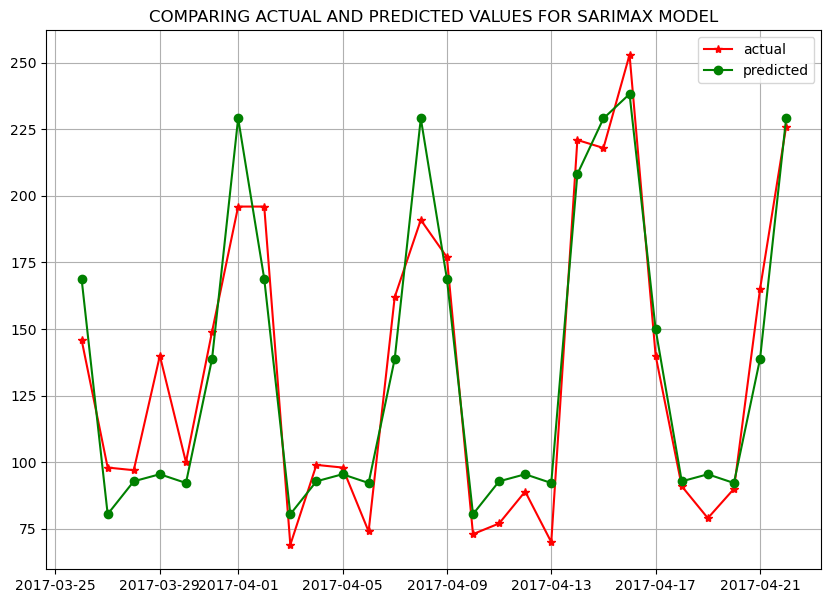

In [106]:
plt.figure(figsize = (10,7))
plt.plot(rest_test['total'] , color = 'r',marker = '*',label = 'actual')
plt.plot(predict2 , color = 'g' , marker = 'o' , label = 'predicted')
plt.title('COMPARING ACTUAL AND PREDICTED VALUES FOR SARIMAX MODEL')
plt.grid()
plt.legend()

## Conclusion

##### We can utilize this model to predict the number of customers who will visit the restaurant with an accuracy rate of approximately 88%. This will assist restaurant owners in staying alert and enhancing their performance and profitability. By utilizing these insights, one can make crucial business decisions and keep ahead of the competition.




